In [2]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

from keras.utils import plot_model
from IPython.display import Image

class EmotionVGGNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1

		# if we are using "channels first", update the input shape
		# and channels dimension
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
			chanDim = 1

		# Block #1: first CONV => RELU => CONV => RELU => POOL
		# layer set
		model.add(Conv2D(32, (3, 3), padding="same",
			kernel_initializer="he_normal", input_shape=inputShape))
		model.add(ELU())
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(32, (3, 3), kernel_initializer="he_normal",
			padding="same"))
		model.add(ELU())
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		# Block #2: second CONV => RELU => CONV => RELU => POOL
		# layer set
		model.add(Conv2D(64, (3, 3), kernel_initializer="he_normal",
			padding="same"))
		model.add(ELU())
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(64, (3, 3), kernel_initializer="he_normal",
			padding="same"))
		model.add(ELU())
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		# Block #3: third CONV => RELU => CONV => RELU => POOL
		# layer set
		model.add(Conv2D(128, (3, 3), kernel_initializer="he_normal",
			padding="same"))
		model.add(ELU())
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(128, (3, 3), kernel_initializer="he_normal",
			padding="same"))
		model.add(ELU())
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		# Block #4: first set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(64, kernel_initializer="he_normal"))
		model.add(ELU())
		model.add(BatchNormalization())
		model.add(Dropout(0.5))

		# Block #6: second set of FC => RELU layers
		model.add(Dense(64, kernel_initializer="he_normal"))
		model.add(ELU())
		model.add(BatchNormalization())
		model.add(Dropout(0.5))

		# Block #7: softmax classifier
		model.add(Dense(classes, kernel_initializer="he_normal"))
		model.add(Activation("softmax"))


		# return the constructed network architecture
		return model


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
elu_9 (ELU)                  (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
elu_10 (ELU)                 (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)        0         
__________

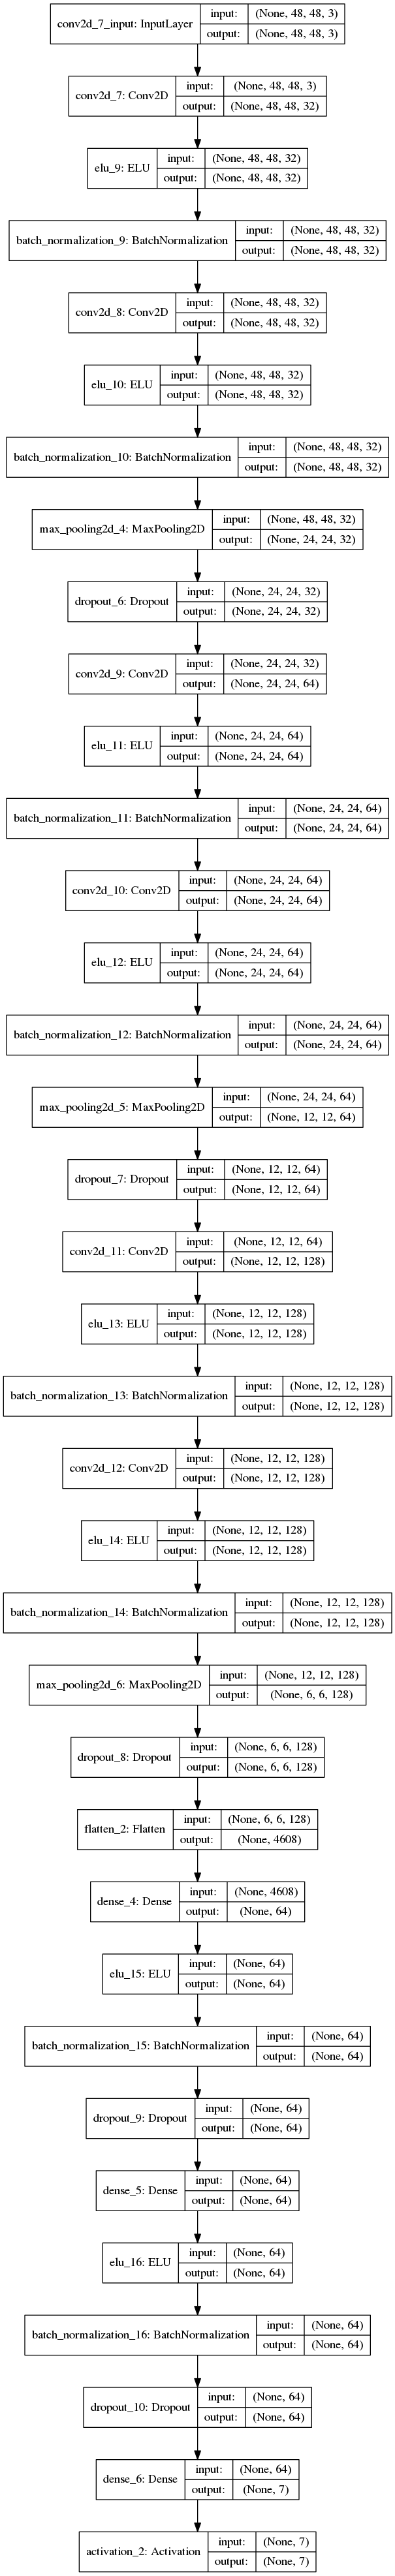

In [4]:

height  = 48
width   = 48
depth   = 3
classes = 7

model = Sequential()
inputShape = (height, width, depth)
chanDim = -1

# if we are using "channels first", update the input shape
# and channels dimension
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1

# Block #1: first CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(32, (3, 3), padding="same",
    kernel_initializer="he_normal", input_shape=inputShape))
model.add(ELU())
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(32, (3, 3), kernel_initializer="he_normal",
    padding="same"))
model.add(ELU())
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block #2: second CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(64, (3, 3), kernel_initializer="he_normal",
    padding="same"))
model.add(ELU())
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), kernel_initializer="he_normal",
    padding="same"))
model.add(ELU())
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block #3: third CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(128, (3, 3), kernel_initializer="he_normal",
    padding="same"))
model.add(ELU())
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), kernel_initializer="he_normal",
    padding="same"))
model.add(ELU())
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block #4: first set of FC => RELU layers
model.add(Flatten())
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(ELU())
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block #6: second set of FC => RELU layers
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(ELU())
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block #7: softmax classifier
model.add(Dense(classes, kernel_initializer="he_normal"))
model.add(Activation("softmax"))

model.summary()
plot_model(model, to_file='emotionVGGNet.png', show_shapes=True)
Image('emotionVGGNet.png')